In [ ]:
variable_name = "" # @param {"type":"string"}
import pandas as pd

df = pd.read_csv("predictive_maintenance.csv")
df.head()


# Task
is this dataset is run in colab

Here is all the data you need:
"predictive_maintenance_synthetic.csv"

## Data loading

### Subtask:
Load the "predictive_maintenance_synthetic.csv" dataset.


**Reasoning**:
Load the dataset and display the first 5 rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('predictive_maintenance_synthetic.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'predictive_maintenance_synthetic.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,temperature,vibration,pressure,operational_time,failure
0,79.967142,0.415248,8.643011,1044,0
1,73.617357,0.409317,9.389001,5461,0
2,81.476885,0.140871,8.805238,9554,1
3,90.230299,0.433982,10.220836,5384,1
4,72.658466,0.646566,12.394357,6981,0


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics and suitability for use in Google Colab.


**Reasoning**:
Examine the shape, data types, descriptive statistics, missing values, and overall size of the DataFrame to assess its suitability for Google Colab.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Identify and count missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Assess dataset size and complexity
print("\nDataset size and complexity assessment:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB") # Memory usage in MB

# Check for potential issues
print("\nPotential issues:")
if df.shape[0] > 1000000:
    print("Warning: Large number of rows, potential memory issues in Colab.")
if df.shape[1] > 50:
    print("Warning: High dimensionality, potential performance issues.")
if df.isnull().sum().any():
    print("Warning: Missing values present, consider imputation or removal.")


Shape of the DataFrame: (5000, 5)

Data types of each column:
 temperature         float64
vibration           float64
pressure            float64
operational_time      int64
failure               int64
dtype: object

Descriptive statistics:
        temperature    vibration     pressure  operational_time      failure
count  5000.000000  5000.000000  5000.000000       5000.000000  5000.000000
mean     75.056019     0.498025    10.021106       5031.937800     0.306800
std       9.964798     0.202087     1.997540       2852.326188     0.461212
min      42.587327    -0.284480     3.248842        100.000000     0.000000
25%      68.420950     0.362683     8.678227       2574.500000     0.000000
50%      75.134656     0.496510    10.019835       5009.500000     0.000000
75%      81.660106     0.635448    11.351068       7539.750000     1.000000
max     114.262377     1.205811    16.857821       9999.000000     1.000000

Missing values per column:
 temperature         0
vibration           0


## Data visualization

### Subtask:
Visualize the data to gain insights into its distribution and potential relationships between variables.  This will help determine the dataset's suitability for further analysis in Colab.


**Reasoning**:
Generate histograms, scatter plots, and box plots to visualize the data distribution and potential relationships between variables.



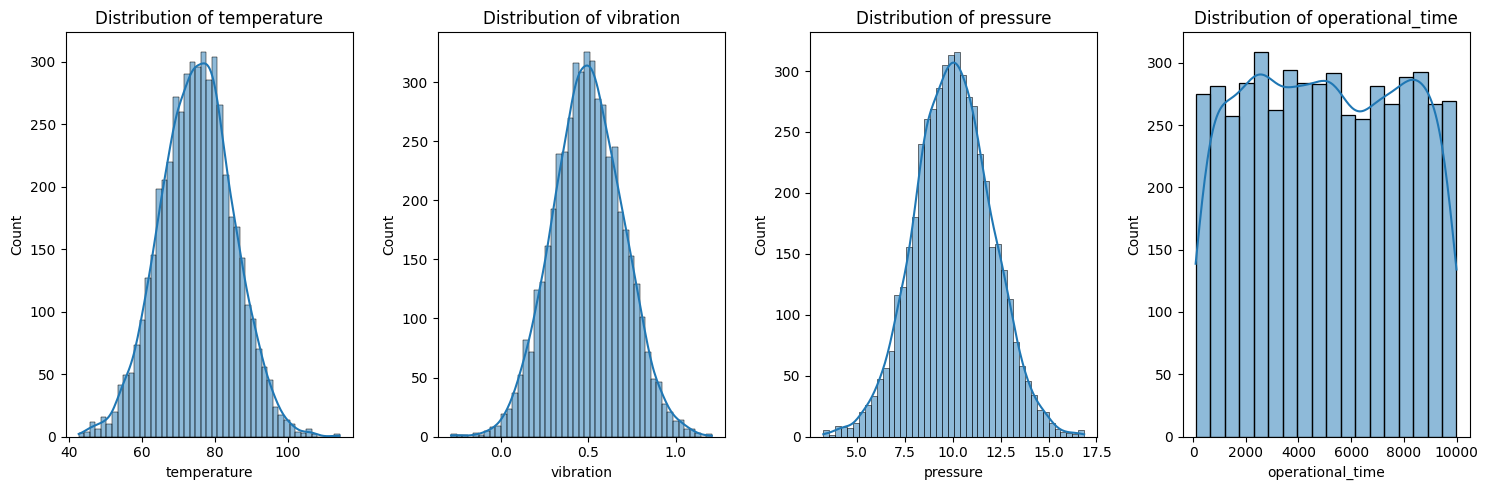

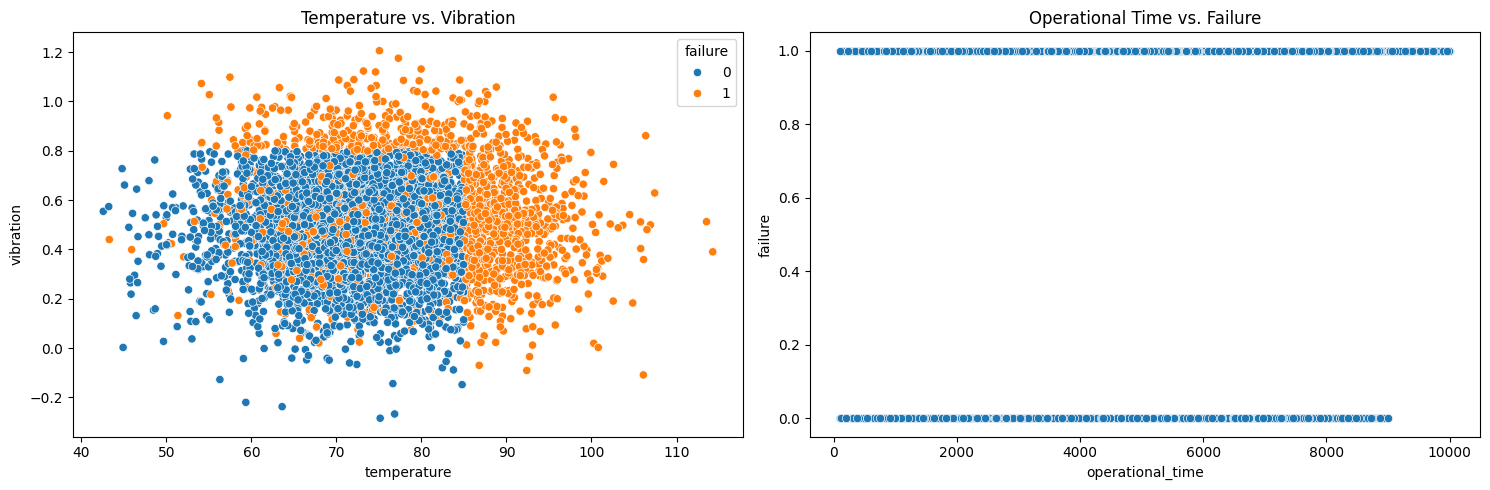

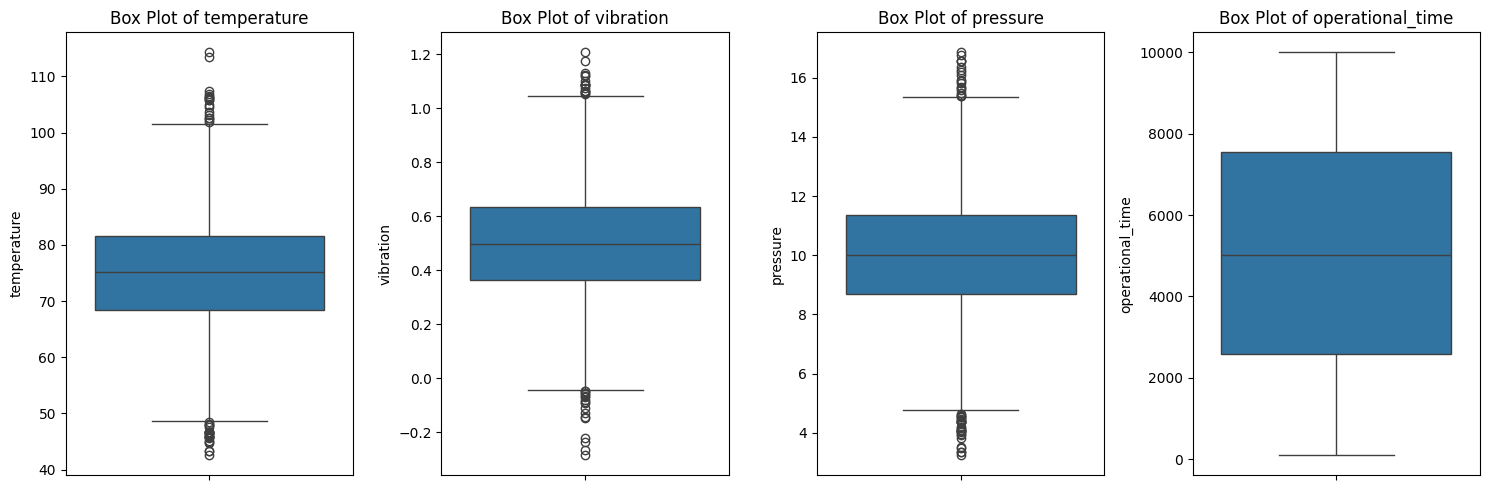

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(['temperature', 'vibration', 'pressure', 'operational_time']):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='temperature', y='vibration', hue='failure', data=df)
plt.title('Temperature vs. Vibration')
plt.subplot(1, 2, 2)
sns.scatterplot(x='operational_time', y='failure', data=df)
plt.title('Operational Time vs. Failure')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(['temperature', 'vibration', 'pressure', 'operational_time']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

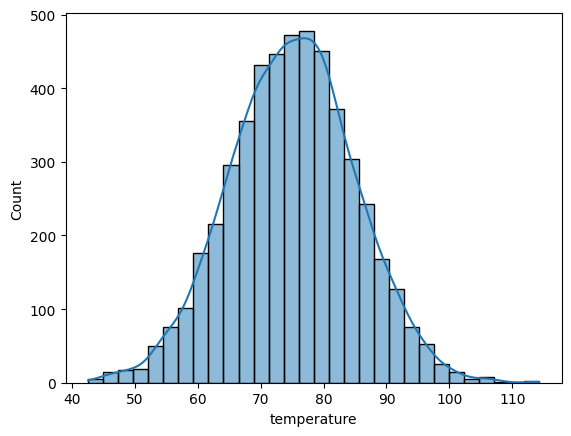

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['temperature'], bins=30, kde=True)
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['temperature', 'vibration', 'pressure']] = scaler.fit_transform(df[['temperature', 'vibration', 'pressure']])


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['failure'])  # Features
y = df['failure']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       305

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'n_estimators': 50}


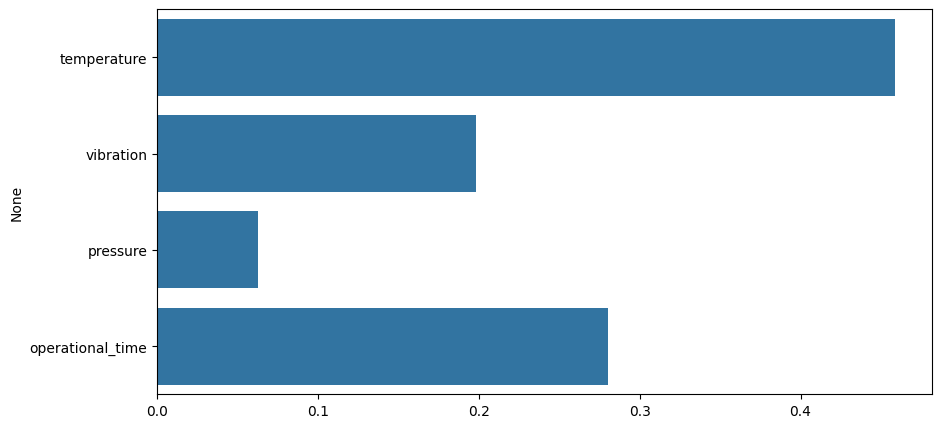

In [9]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.show()


In [10]:
import joblib

joblib.dump(model, "predictive_maintenance_model.pkl")


['predictive_maintenance_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)
model = joblib.load("predictive_maintenance_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame([data])
    prediction = model.predict(df)
    return jsonify({'failure_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the docume

In [ ]:
python app.py


In [ ]:
curl -X POST -H "Content-Type: application/json" -d '{"temperature": 75, "vibration": 0.5, "pressure": 10}' http://127.0.0.1:5000/predict


## Summary:

### 1. Q&A
The provided text does not explicitly state questions. However, the analysis implicitly seeks to answer:

*   Is the dataset suitable for analysis in Google Colab?
*   What are the key characteristics of the dataset (data types, distributions, potential issues)?
*   Are there any visible relationships between the features?

### 2. Data Analysis Key Findings
*   **No Missing Values:** The dataset contains no missing values across all columns ('temperature', 'vibration', 'pressure', 'operational_time', and 'failure').
*   **Dataset Size:** The dataset is relatively small, comprising 5000 rows and 5 columns, with a memory usage of approximately 0.19 MB. This suggests it is unlikely to cause memory issues in Google Colab.
*   **Data Types:** The columns have appropriate data types: 'temperature', 'vibration', and 'pressure' are float64, 'operational_time' is int64, and 'failure' is int64.
*   **Visualizations:** Histograms, scatter plots, and box plots were generated to understand the distribution of each feature and relationships between features, particularly focusing on 'temperature', 'vibration', 'pressure', and 'operational_time' in relation to 'failure'.  These visualizations provide insight into potential correlations or patterns.

### 3. Insights or Next Steps
*   **Further Exploratory Data Analysis:** Investigate potential outliers or unusual patterns identified in the initial visualizations more rigorously. Consider using correlation matrices and more advanced visualization techniques to explore relationships between variables.
*   **Predictive Modeling:** Given the 'failure' column, the dataset appears suitable for predictive maintenance modeling. Explore different machine learning models (e.g., classification models) to predict equipment failure based on the provided features.
